<a href="https://colab.research.google.com/github/o-semenkova/ml_home_tasks/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [59]:
import numpy as np
import pandas as pd
from google.colab import drive
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
drive.mount('/content/drive')
cars_base_df = pd.read_csv("/content/drive/MyDrive/colab_notebooks/machine-learning-by-hanna-pylieva/ml-course-notebooks/data/cars.csv")
cars_base_df.head(5)

Mounted at /content/drive


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
cars_base_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
cars_base_df.isnull().values.any()

False

In [5]:
print(cars_base_df.select_dtypes(include = "object").columns)
print(len(cars_base_df.select_dtypes(include = "object").columns))

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')
5


In [6]:
cars_base_df['Brand'].unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [7]:
cars_base_df['Model'].unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [8]:
cars_base_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [9]:
cars_base_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
cars_base_df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)


```
В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення): Fuel_Type та Transmission
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку: Brand та Model
- 1 колонка, в яких можна встановити відношення порядку: Owner_Type
```


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [11]:
X = cars_base_df[[col for col in cars_base_df.columns if col != 'Price']]

y = cars_base_df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

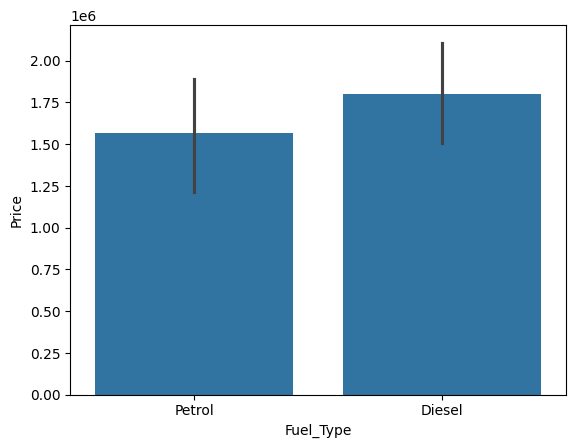

In [12]:
train_Xy = pd.concat([X_train, y_train], axis=1)
test_Xy = pd.concat([X_test, y_test], axis=1)

sns.barplot(data=train_Xy, x='Fuel_Type', y='Price');

In [13]:
fuel_type_codes = {'Petrol': 0, 'Diesel': 1}

train_Xy['fuel_type_code'] = train_Xy.Fuel_Type.map(fuel_type_codes)

test_Xy['fuel_type_code'] = test_Xy.Fuel_Type.map(fuel_type_codes)

In [14]:
train_Xy.Price.corr(train_Xy.fuel_type_code)

0.110782246623349

In [15]:
train_Xy.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type_code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1600000,0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,2600000,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000,0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000,0


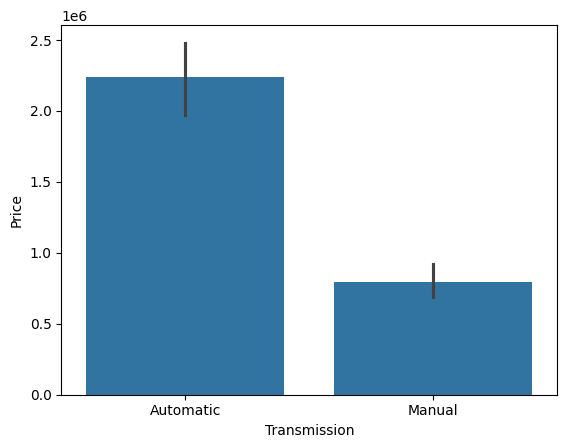

In [16]:
sns.barplot(data=train_Xy, x='Transmission', y='Price');

In [17]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
train_Xy['transmission_code'] = train_Xy.Transmission.map(transmission_codes)
test_Xy['transmission_code'] = test_Xy.Transmission.map(transmission_codes)

In [18]:
train_Xy.Price.corr(train_Xy.transmission_code)

0.6807314925873994

In [19]:
train_Xy.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type_code,transmission_code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1600000,0,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,2600000,1,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000,0,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,0,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000,0,1


In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(train_Xy[['Owner_Type']])

train_Xy['Owner_Type_Codes'] = ordenc.transform(train_Xy[['Owner_Type']])
test_Xy['Owner_Type_Codes'] = ordenc.transform(test_Xy[['Owner_Type']])

Очікуваний результат після трансформацій:

In [21]:
pd.set_option('display.max_columns', 100)
display(train_Xy.head()), display(test_Xy.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type_code,transmission_code,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1600000,0,1,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,2600000,1,1,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000,0,1,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,0,0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000,0,1,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type_code,transmission_code,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1900000,0,1,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,450000,0,0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,0,0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,850000,0,0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,600000,0,0,2.0


(None, None)

In [26]:
country_to_models = {
    'Germany': ['Polo', 'A4', 'X1', 'C-Class', 'Tiguan', 'Q3', '5 Series', 'GLC', 'Passat', 'A6', 'X3', 'E-Class',
                'Ameo', 'A3', '7 Series', 'GLE', 'T-Roc', 'Q7', 'X5', 'GLA', 'Vento', 'A5', '3 Series'],

    'India': ['Nexon', 'Scorpio', 'Harrier', 'Altroz', 'Thar', 'Safari', 'Tigor', 'Tiago', 'XUV300'],

    'Japan': ['Corolla', 'Civic', 'Swift', 'Ertiga', 'City', 'Innova', 'Fortuner', 'Vitara', 'WR-V', 'Yaris',
              'S-Cross', 'BR-V', 'Camry', 'Innova Crysta'],

    'South Korea': ['Sonata', 'Creta', 'Verna', 'Elantra', 'Santro', 'Venue'],

    'USA': ['Mustang', 'Endeavour', 'Figo', 'Aspire', 'Ranger', 'EcoSport']
}

# Convert country_to_models dictionary into a model_to_country mapping
model_to_country = {model: country for country, models in country_to_models.items() for model in models}

# Map the country based on the model
train_Xy["model_country"] = train_Xy["Model"].map(model_to_country)
train_Xy.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type_code,transmission_code,Owner_Type_Codes,model_country
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1600000,0,1,1.0,Germany
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,2600000,1,1,0.0,Germany
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000,0,1,0.0,Germany
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,0,0,1.0,Germany
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000,0,1,1.0,Germany


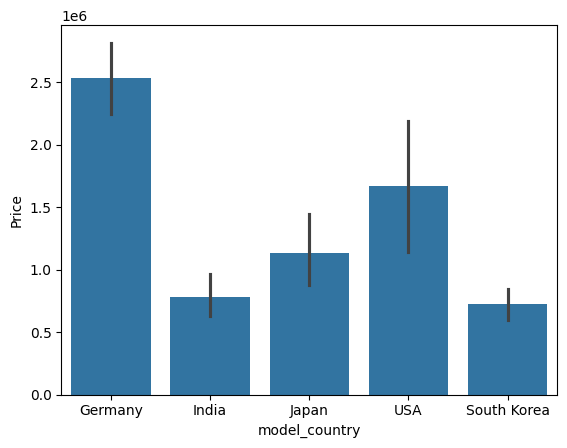

In [27]:
sns.barplot(data=train_Xy, x='model_country', y='Price');

In [29]:
enc = preprocessing.OneHotEncoder()
enc.fit(train_Xy[['model_country']])
enc.categories_

[array(['Germany', 'India', 'Japan', 'South Korea', 'USA'], dtype=object)]

In [32]:
one_hot_enc_model_country = enc.transform(train_Xy[['model_country']]).toarray()
enc.categories_[0]

array(['Germany', 'India', 'Japan', 'South Korea', 'USA'], dtype=object)

In [33]:
train_Xy[enc.categories_[0]] = one_hot_enc_model_country
train_Xy.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type_code,transmission_code,Owner_Type_Codes,model_country,Germany,India,Japan,South Korea,USA
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1600000,0,1,1.0,Germany,1.0,0.0,0.0,0.0,0.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,2600000,1,1,0.0,Germany,1.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000,0,1,0.0,Germany,1.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,0,0,1.0,Germany,1.0,0.0,0.0,0.0,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000,0,1,1.0,Germany,1.0,0.0,0.0,0.0,0.0


In [34]:
test_Xy["model_country"] = test_Xy["Model"].map(model_to_country)
test_Xy.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type_code,transmission_code,Owner_Type_Codes,model_country
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1900000,0,1,1.0,Germany
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,450000,0,0,2.0,South Korea
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,0,0,1.0,Germany
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,850000,0,0,0.0,Japan
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,600000,0,0,2.0,USA


In [35]:
one_hot_enc_model_country = enc.transform(test_Xy[['model_country']]).toarray()
enc.categories_[0]
test_Xy[enc.categories_[0]] = one_hot_enc_model_country
test_Xy.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type_code,transmission_code,Owner_Type_Codes,model_country,Germany,India,Japan,South Korea,USA
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1900000,0,1,1.0,Germany,1.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,450000,0,0,2.0,South Korea,0.0,0.0,0.0,1.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,0,0,1.0,Germany,1.0,0.0,0.0,0.0,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,850000,0,0,0.0,Japan,0.0,0.0,1.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,600000,0,0,2.0,USA,0.0,0.0,0.0,0.0,1.0


**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [38]:
train_Xy = train_Xy.select_dtypes(include=['number'])
train_Xy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 83 to 75
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             80 non-null     int64  
 1   Year               80 non-null     int64  
 2   Kilometers_Driven  80 non-null     int64  
 3   Mileage            80 non-null     int64  
 4   Engine             80 non-null     int64  
 5   Power              80 non-null     int64  
 6   Seats              80 non-null     int64  
 7   Price              80 non-null     int64  
 8   fuel_type_code     80 non-null     int64  
 9   transmission_code  80 non-null     int64  
 10  Owner_Type_Codes   80 non-null     float64
 11  Germany            80 non-null     float64
 12  India              80 non-null     float64
 13  Japan              80 non-null     float64
 14  South Korea        80 non-null     float64
 15  USA                80 non-null     float64
dtypes: float64(6), int64(10)
memory 

In [40]:
corr_matrix = train_Xy.corr()
corr_matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,fuel_type_code,transmission_code,Owner_Type_Codes,Germany,India,Japan,South Korea,USA
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.025560,-0.090537,-0.084381,0.038923,0.067944,-0.024760,-0.052869,0.016831,-0.020240
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,-0.233769,-0.248515,-0.200603,-0.014499,-0.089774,0.320682,-0.014022,-0.092099,-0.150454
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.083951,0.332351,-0.066491,-0.001772,-0.238042,0.003319,0.187628,0.154362,-0.009761
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.638404,0.070112,-0.399164,0.026624,-0.283357,0.319494,0.130547,0.217406,-0.296480
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,0.710561,0.174455,0.456296,-0.196106,0.246593,-0.310301,-0.032832,-0.182213,0.184231
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.849137,-0.076357,0.586910,-0.204309,0.429951,-0.343599,-0.268366,-0.170966,0.240501
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,0.000979,0.412468,-0.070099,-0.043849,-0.117333,-0.006658,0.321071,-0.086439,-0.161451
Price,0.025560,-0.233769,-0.083951,-0.638404,0.710561,0.849137,0.000979,1.000000,0.110782,0.680731,-0.265537,0.692829,-0.399971,-0.283452,-0.263022,-0.004592
fuel_type_code,-0.090537,-0.248515,0.332351,0.070112,0.174455,-0.076357,0.412468,0.110782,1.000000,0.005775,-0.281122,-0.004445,0.077333,0.013475,0.007121,-0.109812
transmission_code,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,0.680731,0.005775,1.000000,0.005886,0.614366,-0.443988,-0.247312,0.031659,-0.122816


In [41]:
# Побудова Heatmap
fig = px.imshow(
    corr_matrix,
    labels=dict(color="Correlation"),
    color_continuous_scale='RdBu_r',  # Вибір кольорової гами
    title="Correlation Matrix Heatmap"
)

fig.show()

```
Виходячи з теплової карти кореляцій можемо бачити, що кореляцію з Price (наша цільова змінна) більше 0.5 мають 5 колонок:
- Engine: 0.71
- Power: 0.849
- transmission_code: 0.68
- Germany: 0.69
- Mileage: -0.638
```

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [42]:
test_Xy = test_Xy.select_dtypes(include=['number'])
test_Xy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 17 to 16
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             20 non-null     int64  
 1   Year               20 non-null     int64  
 2   Kilometers_Driven  20 non-null     int64  
 3   Mileage            20 non-null     int64  
 4   Engine             20 non-null     int64  
 5   Power              20 non-null     int64  
 6   Seats              20 non-null     int64  
 7   Price              20 non-null     int64  
 8   fuel_type_code     20 non-null     int64  
 9   transmission_code  20 non-null     int64  
 10  Owner_Type_Codes   20 non-null     float64
 11  Germany            20 non-null     float64
 12  India              20 non-null     float64
 13  Japan              20 non-null     float64
 14  South Korea        20 non-null     float64
 15  USA                20 non-null     float64
dtypes: float64(6), int64(10)
memory 

In [66]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = np.sqrt(mean_squared_error(targets, predictions))
  print('Loss:', loss)
  return model

In [67]:
input_cols = ['Engine', 'Power', 'transmission_code', 'Germany', 'Mileage']
inputs = train_Xy[input_cols]
targets = train_Xy['Price']
model = train_model_show_rmse(inputs, targets)

Loss: 371886.8814321372


In [68]:
targets_test = test_Xy['Price']
predictions = model.predict(test_Xy[input_cols])
loss = np.sqrt(mean_squared_error(targets_test, predictions))
print('Loss:', loss)

Loss: 309388.7267302651


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?